# 1. Perkenalan 

**Nama : Dimas Furqon P.** 
**Kelas : Data Science Delta Indie Course**


# 2. Latar Belakang

## 2.a Data Overview

Obesity Prediction Dataset adalah sebuah dataset yang digunakan untuk mengestimasi level obesitas berdasarkan beberapa variabel penyebab, diantaranya : 
1. Kebiasaan/pola makan
2. Riwayat keluarga dan kondisi kesehatan.

Data tersebut diambil dari sekelompok individu yang berasal dari beberapa negara seperti, Meksiko, Peru dan Kolombia, yang mencakup 16 gaya hidup yang berhubungan dengan kesehatan dan terdiri dari 211 data/record. 
Label yang mengklasifikasikan level obesitas berdasarkan pada rentang dari "underweight" hingga pada beberapa tipe obesitas yang berbeda.

Banyak data yang dibuat melalui proses teknik sintetis, sementara beberapa data lainnya diambil langsung dari pengguna melalui web. Data ini bermanfaat untuk melakukan klasifikasi, regresi dan tugas pengelompokkan data/clustering.

Beberapa variabel yang terdapat dalam dataset ini dan dapat dianalisis antara lain: 

1. Gender : Laki-laki atau perempuan
2. Age : Usia dalam tahun
3. Height : Tinggi dalam meter
4. Weight : Bobot/Massa dalam Kilogram
5. family_history_with_overweight : Apakah orang tersebut memiliki riwayat dengan berat badan  berlebih(ya/tidak)
6. FAVC : Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
7. FCVC : Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
8. NCP : Jumlah makanan utama per hari
9. CAEC : Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)
10. SMOKE : Apakah seseorang tersebut adalah perokok (ya/tidak)
11. CH2O : Konsumsi minum perhari (skala 1 s.d 3)
12. SCC : Apakah seseorang melakukan kontrol terhadap kalori harian(ya/tidak)
13. FAF : Frekuensi melakukan aktivitas fisik (skala 0 s.d 3)
14. TUE : Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3)
15. CALC : Frekuensi mengkonsumsi alkohol (Tidak pernah, Jarang, Sering, Selalu)
16. MTRANS : Moda utama yang digunakan untuk transportasi (Mobil, Sepeda, Sepeda Motor, Transportasi umum, Jalan kaki)
17. NObeyesdad : Level Obesitas(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

Data ini memberikan pandangan yang terstruktur tentang bagaimana perbedaan gaya hidup mempengaruhi kepada tingkat obesitas seseorang, berguna dalam analisis kesehatan dan membuat keputusan.

## 2.b Data Objective

Final Project 1 ini dibuat guna mengevaluasi konsep Machine Learning bertipe Klasifikasi dengan :

● Mampu memahami konsep Classification dengan Ensemble Model

● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 3. Import Pustaka (Library)

In [55]:
!pip install pandas-dq

Defaulting to user installation because normal site-packages is not writeable


In [56]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [57]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from pandas_dq import dq_report,Fix_DQ

# 4. Data Loading

## 4.1 Memanggil Dataset

In [58]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 4.2 Melihat ukuran/dimensi data (baris,kolom)

In [59]:
df.shape

(2111, 17)

## 4.3 Pengecekan nama kolom 

In [60]:
da = df.columns.values
da
dc = pd.DataFrame({'Nama kolom':da})
dc

,Nama kolom
0,Gender
1,Age
2,Height
3,Weight
4,family_history_with_overweight
5,FAVC
6,FCVC
7,NCP
8,CAEC
9,SMOKE


## 4.4 Penjelasan per kolom

In [61]:
de = np.array(['Laki-laki atau perempuan',
               'Usia dalam tahun',
               'Tinggi dalam meter',
               'Bobot/Massa dalam Kilogram',
               'Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)',
               'Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)',
               'Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)',
               'Jumlah makanan utama per hari',
               'Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)',
               'Apakah seseorang tersebut adalah perokok (ya/tidak)',
               'Konsumsi minum perhari (skala 1 s.d 3)',
               'Apakah seseorang melakukan kontrol terhadap kalori harian(ya/tidak)',
               'Frekuensi melakukan aktivitas fisik (skala 0 s.d 3)',
               'Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3)',
               'Frekuensi mengkonsumsi alkohol (Tidak pernah, Jarang, Sering, Selalu)',
               'Moda utama yang digunakan untuk transportasi (Mobil, Sepeda, Sepeda Motor, Transportasi umum, Jalan kaki)',
               'Level Obesitas(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)'])

penjelasan = pd.DataFrame({'Nomor Kolom':np.arange(1,len(de) + 1,1),
                           'Nama Kolom':da,
                           'Penjelasan Kolom':de})
penjelasan.set_index('Nomor Kolom')

,Nama Kolom,Penjelasan Kolom
Nomor Kolom,,
1,Gender,Laki-laki atau perempuan
2,Age,Usia dalam tahun
3,Height,Tinggi dalam meter
4,Weight,Bobot/Massa dalam Kilogram
5,family_history_with_overweight,Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)
6,FAVC,Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
7,FCVC,Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
8,NCP,Jumlah makanan utama per hari
9,CAEC,"Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)"


## 4.5 Tipe Data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## 4.6 Deskriptif Statistik

In [63]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 4.7 Pengecekan Missing Value 

In [64]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [65]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

karena data yang diperoleh dari awal sudah tidak memiliki "missing values" maka kita bisa melewatkan step untuk pembersihan missing value.

## 4.8 Pengecekan data duplikat

In [66]:
df.duplicated().sum()

24

In [67]:
df[df.duplicated()].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


setelah kita melakukan peninjauan terhadap data yang terindikasi duplikat, ternyata data tersebut bukanlah data duplikat melainkan **data yang memiliki identitas yang mirip tetapi memiliki nilai yang berbeda pada beberapa variabel**, dan berdasarkan hasil preview tersebut dapat disimpulkan bahwa data yang terindikasi duplikat adalah data yang berbeda (unik).

# 5. Eksplorasi Data Analisis

## Deskripsi

In [68]:
# Melihat sebaran data dari jenis obesitas 
panjang = len(df["NObeyesdad"].unique())
jenis = {'Nomor': np.arange(1,panjang+1,1),
         'jenis': np.array(df["NObeyesdad"].unique()),
         'jumlah': np.array(df["NObeyesdad"].value_counts())
        }
jenis
jo = pd.DataFrame(jenis)
jo.set_index('Nomor')


,jenis,jumlah
Nomor,,
1,Normal_Weight,351
2,Overweight_Level_I,324
3,Overweight_Level_II,297
4,Obesity_Type_I,290
5,Insufficient_Weight,290
6,Obesity_Type_II,287
7,Obesity_Type_III,272


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


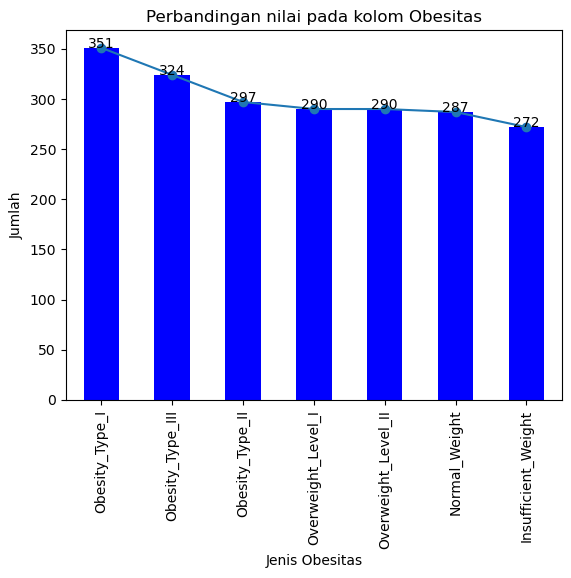

In [69]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom "Kematian" dalam DataFrame "df"
value_counts = df["NObeyesdad"].value_counts()

# Membuat grafik batang dengan menggunakan fungsi plot()

value_counts.plot(kind="bar", color = 'Blue')

# Annotate data points with labels
x = jo["jenis"]
y = jo["jumlah"]

plt.plot(x,y,marker='o')

# Menambahkan data label
for i, value in enumerate(y):
    plt.text(i, value + 0.1, str(value), ha='center')

# Memberikan judul pada grafik
plt.title("Perbandingan nilai pada kolom Obesitas")

# Memberikan label sumbu x
plt.xlabel("Jenis Obesitas")

# Memberikan label sumbu y
plt.ylabel("Jumlah")

# Menampilkan jumlah kemunculan setiap nilai pada kolom "Jenis Obesitas"
print(value_counts)

# Memunculkan Grafik 
plt.show()


## 5.1 Kesimpulan

dari grafik batang diatas dapat disimpulkan bahwa jenis obesitas yang paling terjadi adalah Obesity_TypeI sebanyak 351 Kejadian, dan jenis obesitas yang paling rendah terjadi adalah insufficient_weight dengan jumlah kejadian sebanyak 272 kejadian.

Kolom **"NObeyesdad"** atau kolom **Jenis Obesitas** akan dijadikan kolom target, dan dari grafik diatas dapat terlihat bahwa kolom ini memiliki kelas yang sebarannya tidak merat, yaitu salah satu kelas lebih sedikit dibandingkan dengan kelas lainnya, hal ini dapat dipertimbangkan apakah perlu dilakukan balancing/resampling untuk data ini.

## 5.2 Catplot

Untuk menampilkan hubungan antara kolom penyebab/independen dengan kolom target/dependen, dapat dilihat hubungannya melalui grafik batang yang akan ditampilkan 

In [70]:
penjelasan

,Nomor Kolom,Nama Kolom,Penjelasan Kolom
0,1,Gender,Laki-laki atau perempuan
1,2,Age,Usia dalam tahun
2,3,Height,Tinggi dalam meter
3,4,Weight,Bobot/Massa dalam Kilogram
4,5,family_history_with_overweight,Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)
5,6,FAVC,Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
6,7,FCVC,Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
7,8,NCP,Jumlah makanan utama per hari
8,9,CAEC,"Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)"
9,10,SMOKE,Apakah seseorang tersebut adalah perokok (ya/tidak)


### 5.2.a membandingkan kolom "Jenis Obesitas" dengan "Jenis Kelamin"

In [71]:
df[['NObeyesdad','Gender']]

,NObeyesdad,Gender
0,Normal_Weight,Female
1,Normal_Weight,Female
2,Normal_Weight,Male
3,Overweight_Level_I,Male
4,Overweight_Level_II,Male
5,Normal_Weight,Male
6,Normal_Weight,Female
7,Normal_Weight,Male
8,Normal_Weight,Male
9,Normal_Weight,Male


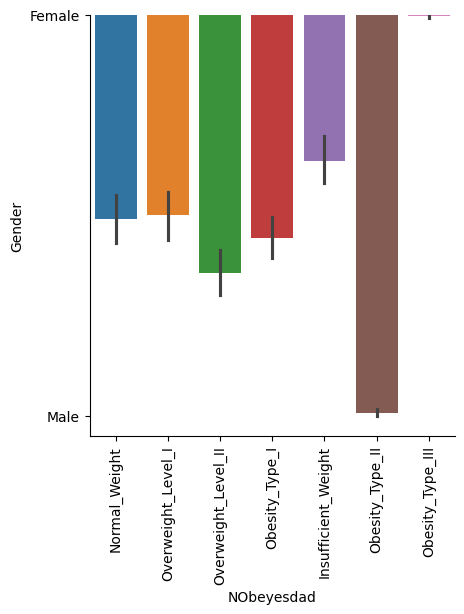

In [72]:
# Memilih kolom 'Gender' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Gender']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'jenis kelamin' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Gender', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari barplot di atas, dapat disimpulkan bahwa resiko obesitas akan cenderung meningkat kepada orang yang berjenis kelamin laki-laki dibandingkan dengan perempuan.

### 5.2.b membandingkan kolom "Jenis Obesitas" dengan "Usia"

In [73]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

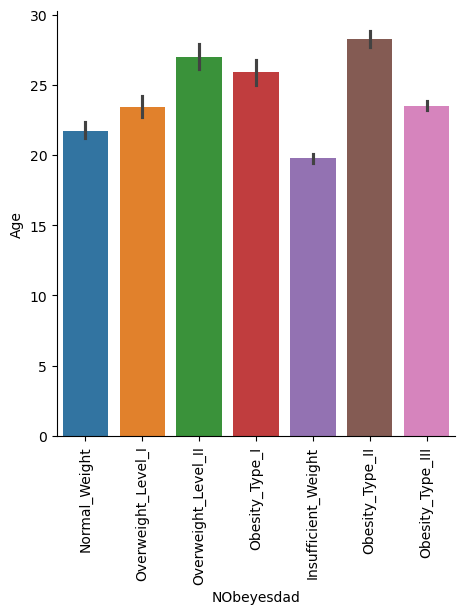

In [74]:
# Memilih kolom 'Age' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Age']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'umur' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Age', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari bar diatas dapat dilihat bahwa kecenderungan usia yang semakin meningkat, akan semakin meningkatkan resiko obesitas pada level yang lebih tinggi.

### 5.2.c membandingkan kolom "Jenis Obesitas" dengan "Tinggi"

In [75]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

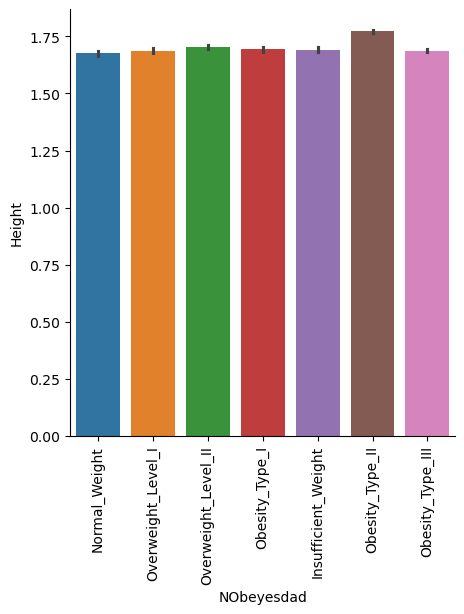

In [76]:
# Memilih kolom 'Height' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Height']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'tinggi' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Height', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari gambar diatas dapat diketahui bahwa sebaran jenis obesitas hampir tidak berpengaruh terhadap postur tinggi badan, hanya saja seseorang dengan tinggi 175 cm lebih rawan untuk terkena Obesitas Tipe II

### 5.2.d membandingkan kolom "Jenis Obesitas" dengan "Berat badan"

In [77]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

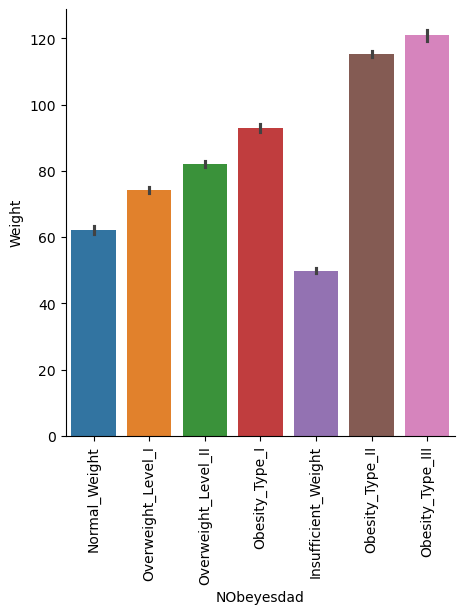

In [78]:
# Memilih kolom 'Weight' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Weight']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'berat badan' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Weight', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dapat terlihat sangat jelas bahwa tingkat keparahan obesitas akan semakin meningkat seiring dengan peningkatan berat badan seseorang.

### 5.2.e membandingkan kolom "Jenis Obesitas" dengan "Riwayat obesitas"

In [79]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

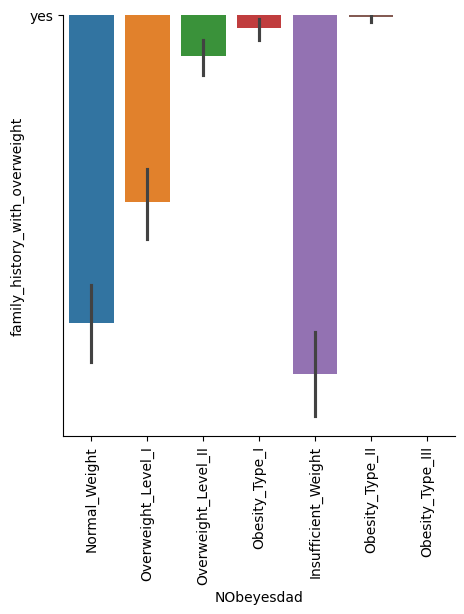

In [80]:
# Memilih kolom 'family_history_with_overweight' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['family_history_with_overweight','NObeyesdad']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'Riwayat obesitas' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'family_history_with_overweight', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari chart di atas dapat terlihat bahwa sumbu y yang semakin menuju titik 0 menandakan bahwa tidak adanya riwayat keluarga yang memiliki diabetes. Hal itu menunjukan juga bahwa orang yang tidak memiliki riwayat obesitas keluarga, memiliki kecenderungan lebih tinggi terhadap berat badan normal ataupun berat badan kurang.

### 5.2.f membandingkan kolom "Jenis Obesitas" dengan "Konsumsi Makan Kalori tinggi"

In [81]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

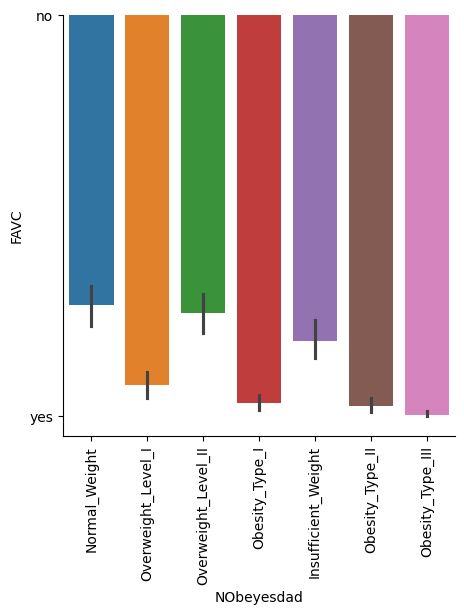

In [82]:
# Memilih kolom 'FAVC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FAVC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FAVC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FAVC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan gambar diatas juga dapat disimpulkan bahwa potensi tertinggi seseorang untuk terkena obesitas semakin meningkat apabila orang tersebut gemar mengkonsumsi makanan yang berkalori tinggi.

### 5.2.g membandingkan kolom "Jenis Obesitas" dengan "Konsumsi buah-buahan"

In [83]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

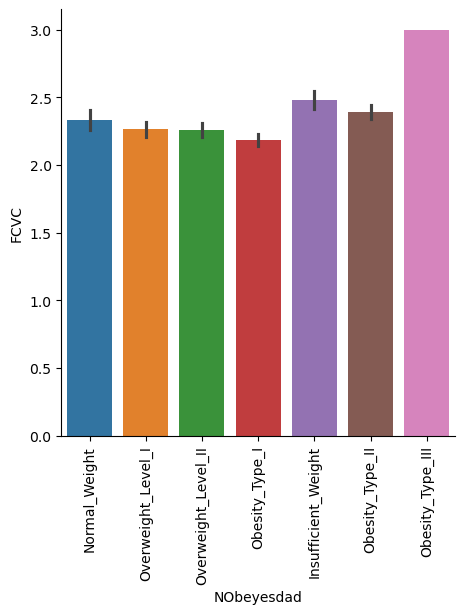

In [84]:
# Memilih kolom 'FCVC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FCVC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FCVC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FCVC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan grafik dapat terlihat bahwa kemungkinan orang yang mengkonsumsi buah-buahan lebih banyak akan menurunkan resiko untuk mendapatkan obesitas, namun begitu ada sedikit anomali pada orang dengan obesitas tipe 3 yang justru meningkatkan peluang obesitas sedangkan konsumsi buah-buahan yang dilakukan berada pada angka yang cukup tinggi. Oleh karena itu perlu dilakukan pengecekan lebih lanjut untuk mendeteksi apakah ada outlier/data yang tidak valid.

### 5.2.h membandingkan kolom "Jenis Obesitas" dengan "Jumlah makanan utama per hari"

In [85]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

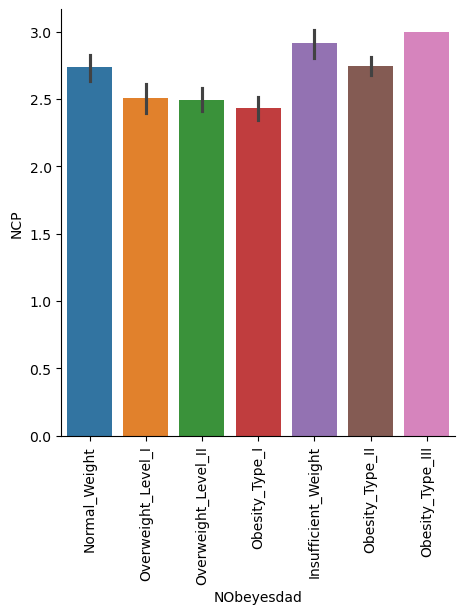

In [86]:
# Memilih kolom 'NCP' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','NCP']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'NCP' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'NCP', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Data diatas menunjukkan bahwa jumlah makan utama per hari meningkatkan resiko pada tingkat obesitas yang lebih tinggi yang berlaku pada orang yang berstatus obesitas, tidak berlaku bagi orang dengan berat badan normal maupun berat badan kurang.

### 5.2.i membandingkan kolom "Jenis Obesitas" dengan "Frekuensi cemilan diantara makan utama"

In [87]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

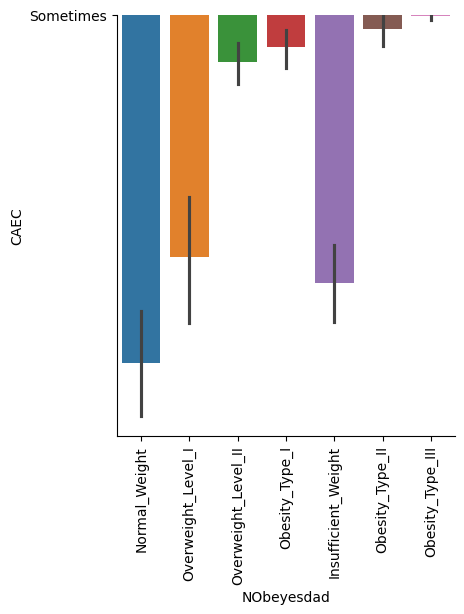

In [88]:
# Memilih kolom 'CAEC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CAEC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CAEC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CAEC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari data diatas terlihat bahwa frekuensi cemilan diantara makan utama akan meningkatkan resiko obesitas pada tingkat yang lebih tinggi


### 5.2.j membandingkan kolom "Jenis Obesitas" dengan "Konsumsi Rokok"

In [89]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

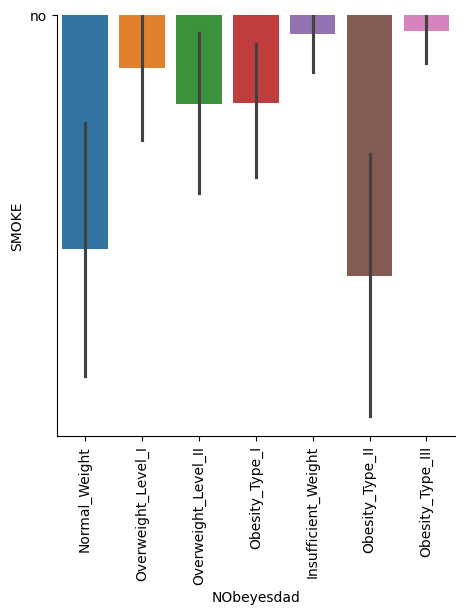

In [90]:
# Memilih kolom 'SMOKE' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','SMOKE']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'SMOKE' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'SMOKE', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan grafik diatas nampak bahwa kejadian tertinggi untuk obesitas pada perokok adalah pada obesitas tipe 2 sedangkan untuk tingkat yang lain umumnya tidak terlalu berpengaruh.

### 5.2.k membandingkan kolom "Jenis Obesitas" dengan "Konsumsi minum air per hari"

In [91]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

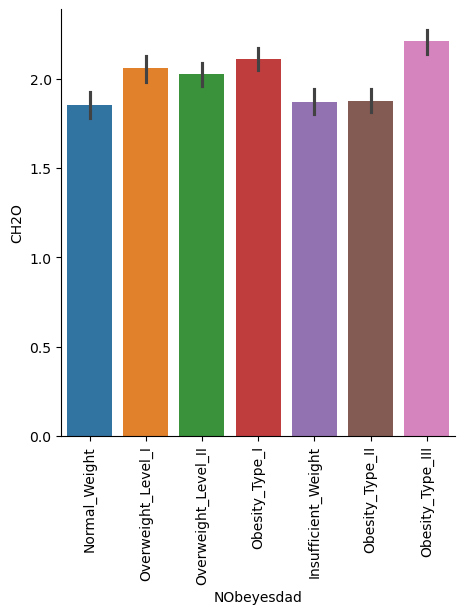

In [92]:
# Memilih kolom 'CH2O' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CH2O']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CH2O' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CH2O', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Frekuensi minum air pada penderita obesitas umumnya akan meningkatkan tingkat obesitas.

### 5.2.l membandingkan kolom "Jenis Obesitas" dengan "Kontrol kalori harian"

In [93]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

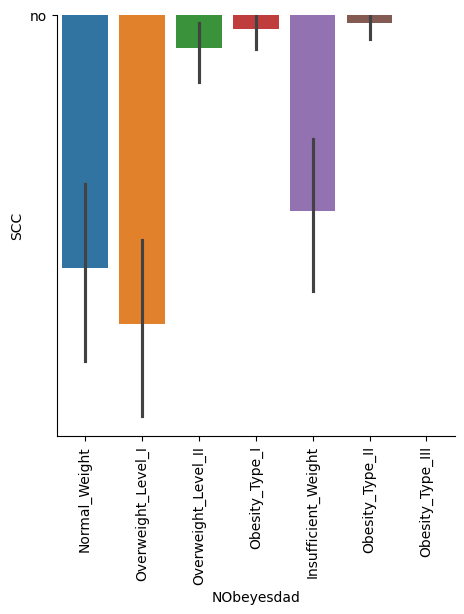

In [94]:
# Memilih kolom 'SCC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','SCC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'SCC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'SCC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**


### 5.2.m membandingkan kolom "Jenis Obesitas" dengan "Frekuensi aktifitas fisik"

In [95]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

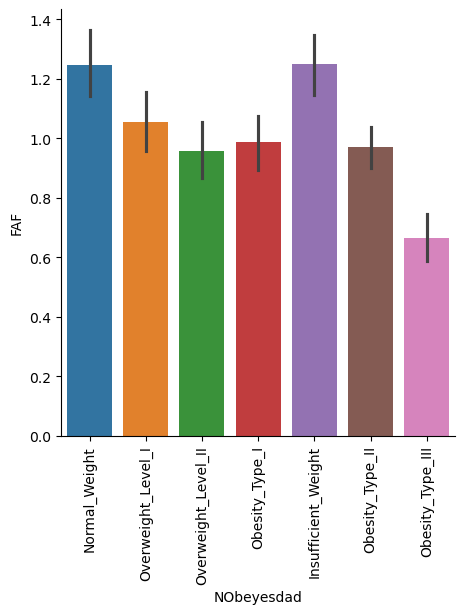

In [96]:
# Memilih kolom 'FAF' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FAF']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FAF' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FAF', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.n membandingkan kolom "Jenis Obesitas" dengan "Waktu yang dihabiskan untuk teknologi"

In [97]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

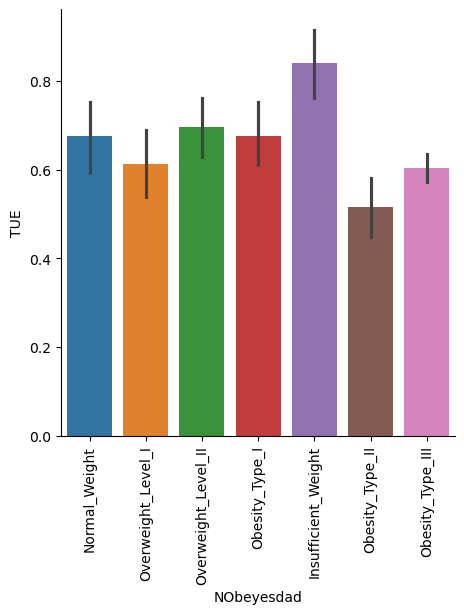

In [98]:
# Memilih kolom 'TUE' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','TUE']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'TUE'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'TUE', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.o membandingkan kolom "Jenis Obesitas" dengan "Frekuensi mengonsumsi alkohol"

In [99]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

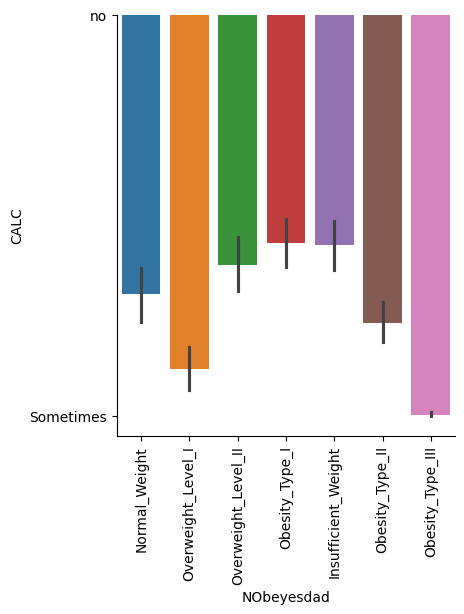

In [100]:
# Memilih kolom 'CALC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CALC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CALC'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CALC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.p membandingkan kolom "Jenis Obesitas" dengan "Moda Utama yang digunakan dalam Transportasi"

In [101]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

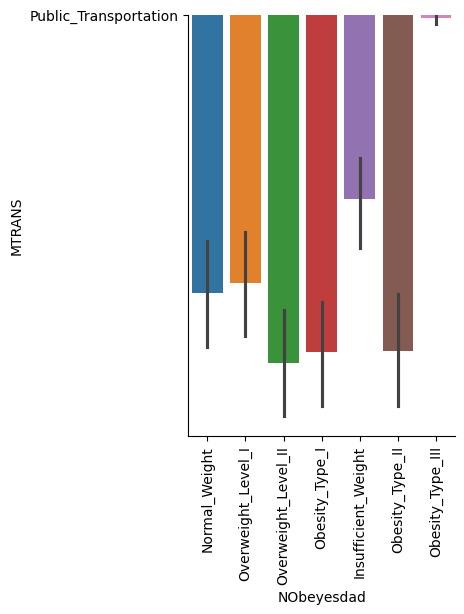

In [102]:
# Memilih kolom 'MTRANS' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','MTRANS']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'MTRANS'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'MTRANS', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

## 5.3. Barplot

====== Grafik batang Jenis obesitas dengan Gender ======


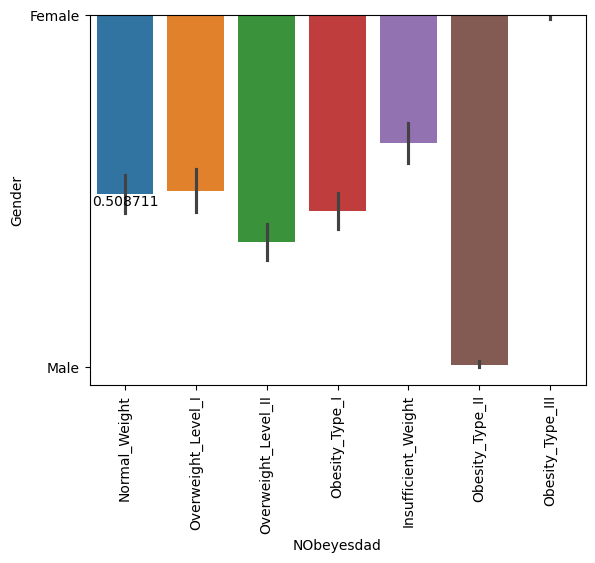

====== Grafik batang Jenis obesitas dengan Age ======


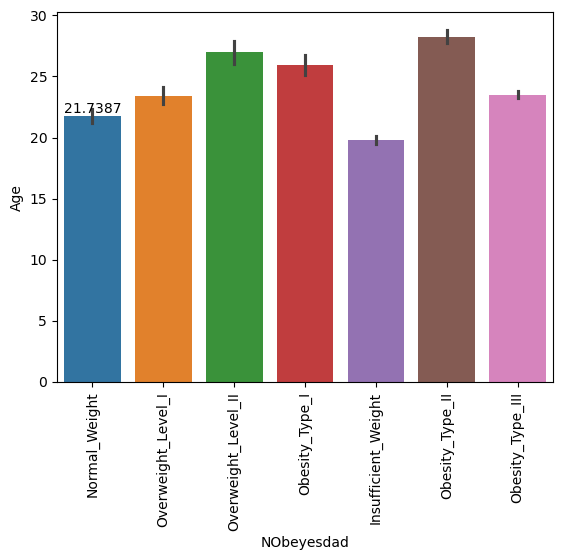

====== Grafik batang Jenis obesitas dengan Height ======


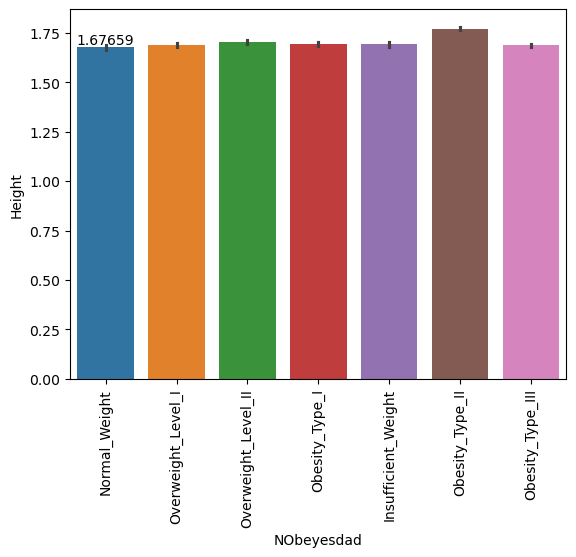

====== Grafik batang Jenis obesitas dengan Weight ======


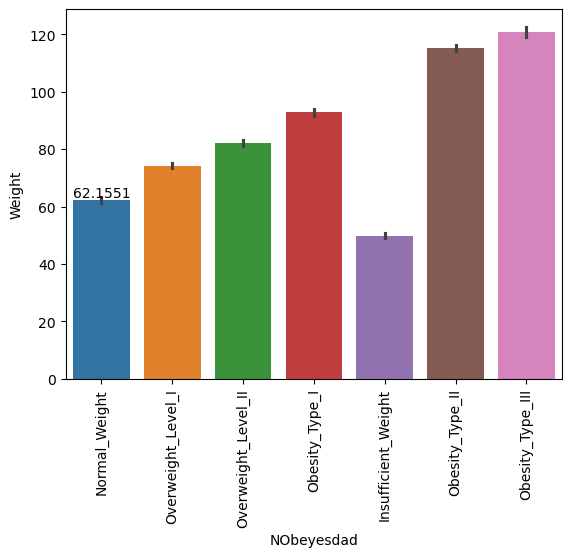

====== Grafik batang Jenis obesitas dengan family_history_with_overweight ======


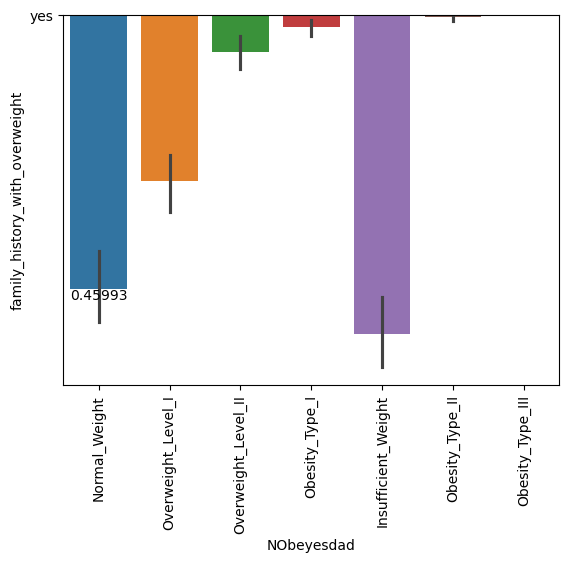

====== Grafik batang Jenis obesitas dengan FAVC ======


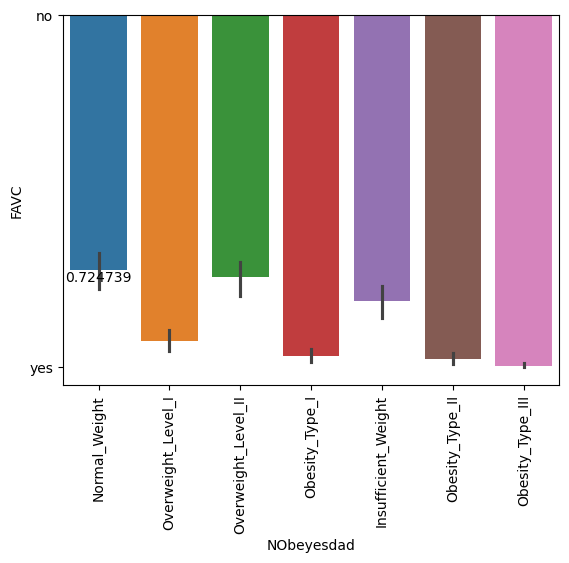

====== Grafik batang Jenis obesitas dengan FCVC ======


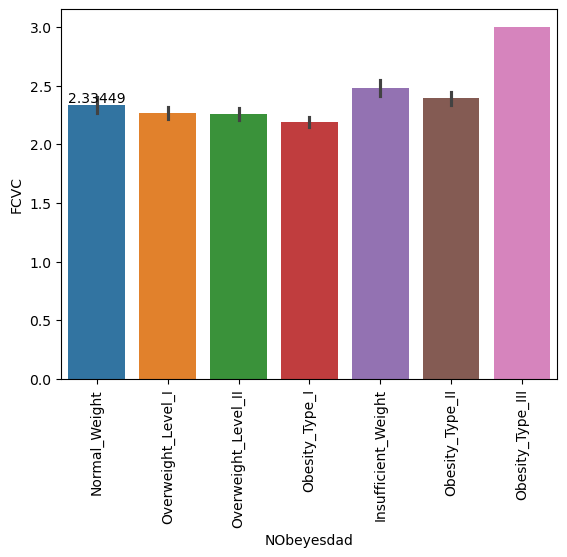

====== Grafik batang Jenis obesitas dengan NCP ======


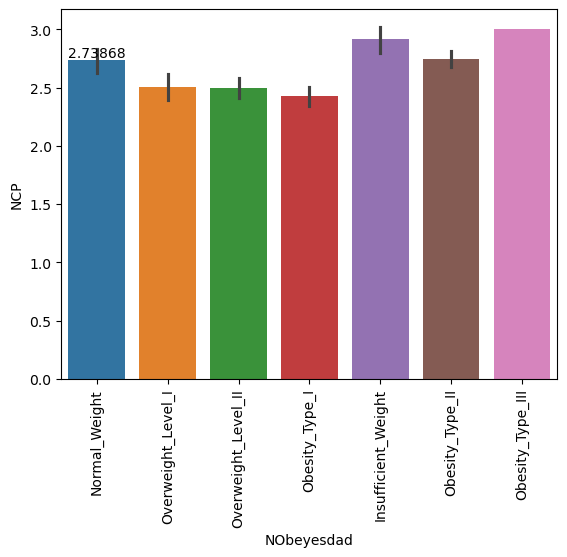

====== Grafik batang Jenis obesitas dengan CAEC ======


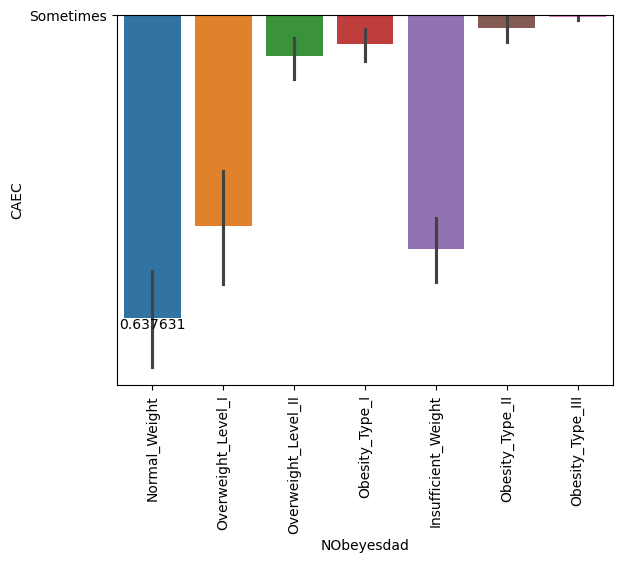

====== Grafik batang Jenis obesitas dengan SMOKE ======


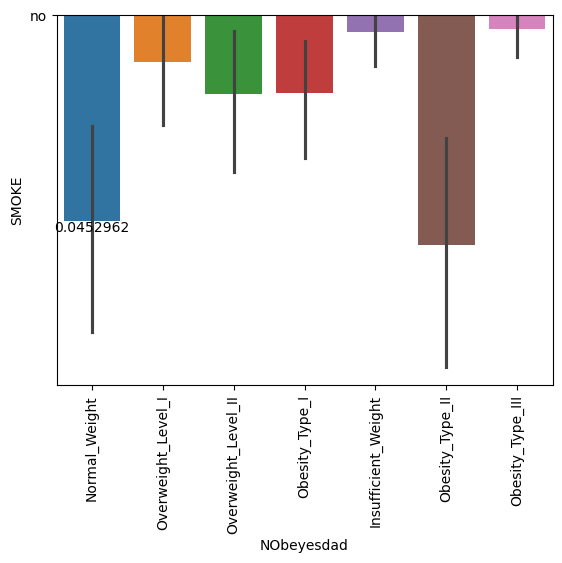

====== Grafik batang Jenis obesitas dengan CH2O ======


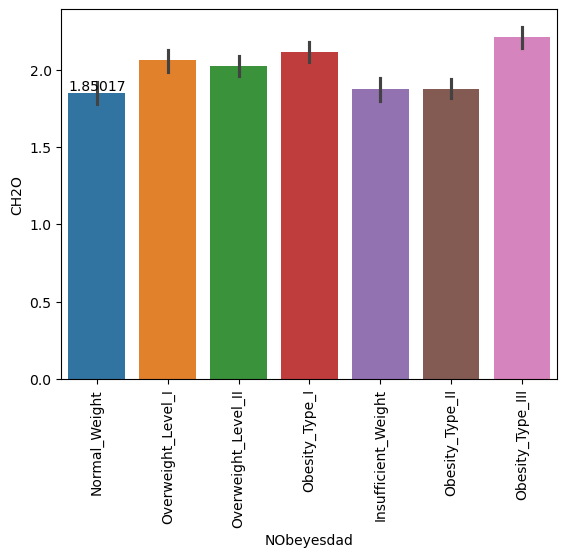

====== Grafik batang Jenis obesitas dengan SCC ======


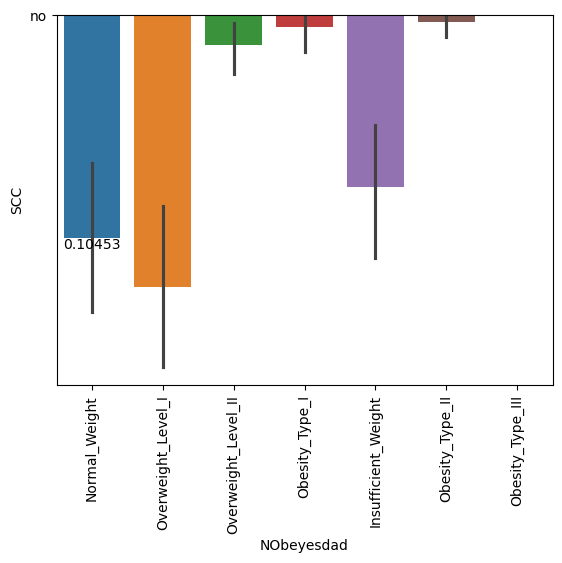

====== Grafik batang Jenis obesitas dengan FAF ======


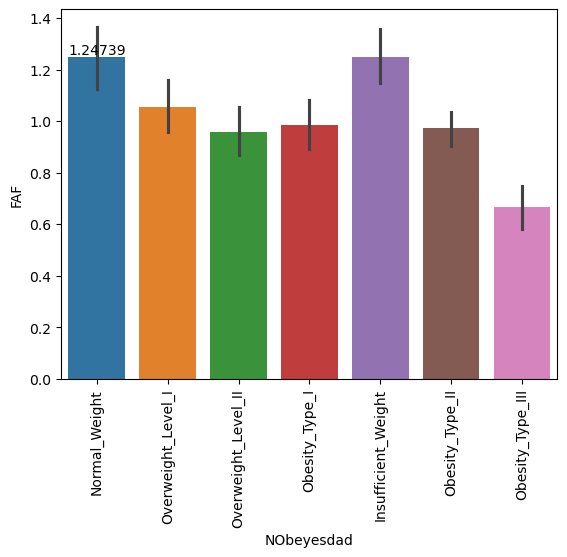

====== Grafik batang Jenis obesitas dengan TUE ======


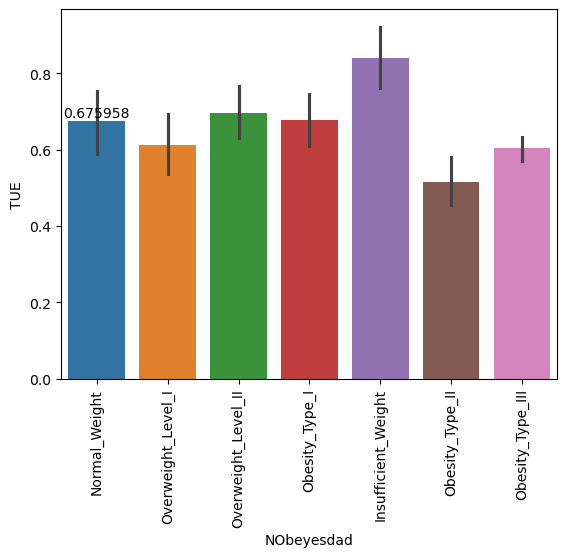

====== Grafik batang Jenis obesitas dengan CALC ======


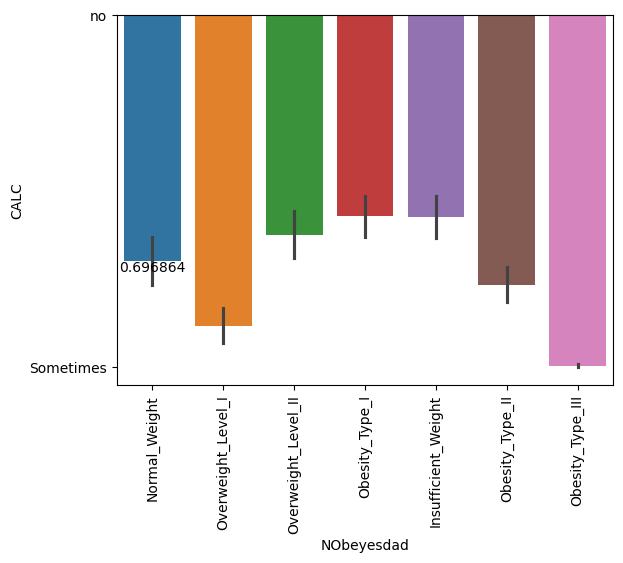

====== Grafik batang Jenis obesitas dengan MTRANS ======


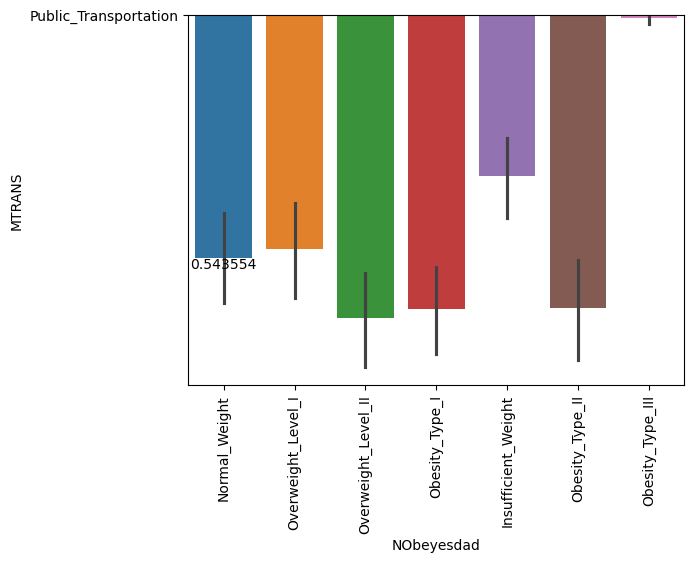

====== Grafik batang Jenis obesitas dengan NObeyesdad ======


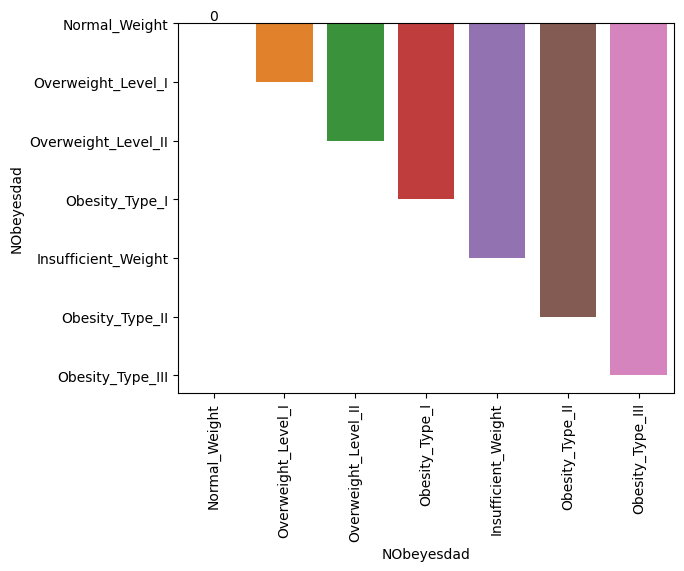

In [103]:
# Memanggil barplot berdasarkan kolom tertentu
for col in df.columns:
    print(f'====== Grafik batang Jenis obesitas dengan {col} ======')
    ax = sns.barplot(data=df, x='NObeyesdad', y = col, hue='NObeyesdad')
    ax.bar_label(container=ax.containers[0], fontsize=10)
    plt.xticks(rotation = 90)
    plt.show()
    print("=====================================================")

## 5.4 Label Encoder

Label Encoder digunakan untuk melakukan kodifikasi terhadap variabel yang memiliki nilai kategorik menjadi nilai yang bersifat kuantitatif (non kategorik).

Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

In [104]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Dari dataset yang kita miliki terdapat beberapa variabel yang perlu dilakukan transformasi data ke label encoder diantaranya : 
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- SCC
- CALC
- MTRANS 
- NObeyesdad

untuk membedakan hasil antara data yang telah dilakukan encoding dengan yang tidak maka kita perlu membuat 1 duplikat data dari data set awal df menjadi 'data label encoder' atau dle

In [105]:
dlc = df.copy()
dlc.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [106]:
dlc["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [107]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dle["NObeyesdad"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dle["NObeyesdad"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

label = pd.DataFrame(labelkode)
label.sort_values(by='Kode', ascending=True, inplace=True)
label


NameError: name 'dle' is not defined

### 5.4.1. Label Encoder Variabel Jenis Obesitas/ 'NObeyesdad'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["NObeyesdad"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["NObeyesdad"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

labelobes = pd.DataFrame(labelkode)
labelobes.sort_values(by='Kode', ascending=True, inplace=True)
labelobes

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Obes'] = le.fit_transform(dlc['NObeyesdad'])
dlc.head()

In [ ]:
labelobes

### 5.4.2. Label Encoder Variabel Riwayat Obesitas Keluarga/ 'family_history_with_overweight'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["family_history_with_overweight"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["family_history_with_overweight"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

labelfamily = pd.DataFrame(labelkode)
labelfamily.sort_values(by='Kode', ascending=True, inplace=True)
labelfamily

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Fam'] = le.fit_transform(dlc['family_history_with_overweight'])
dlc.tail()

### 5.4.3. Label Encoder Variabel Konsumsi Makanan Tinggi Kalori/ 'FAVC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["FAVC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["FAVC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori FAVC': original_labels}

labelFAVC = pd.DataFrame(labelkode)
labelFAVC.sort_values(by='Kode', ascending=True, inplace=True)
labelFAVC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_FAVC'] = le.fit_transform(dlc['FAVC'])
dlc.tail()

### 5.4.4. Label Encoder Variabel Konsumsi Cemilan diantara Waktu Makan/ 'CAEC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["CAEC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["CAEC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori CAEC': original_labels}

labelCAEC = pd.DataFrame(labelkode)
labelCAEC.sort_values(by='Kode', ascending=True, inplace=True)
labelCAEC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_CAEC'] = le.fit_transform(dlc['CAEC'])
dlc.tail()

### 5.4.5. Label Encoder Variabel Apakah mengkonsumsi rokok/ 'SMOKE'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["SMOKE"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["SMOKE"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori SMOKE': original_labels}

labelSMOKE = pd.DataFrame(labelkode)
labelSMOKE.sort_values(by='Kode', ascending=True, inplace=True)
labelSMOKE

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_SMOKE'] = le.fit_transform(dlc['SMOKE'])
dlc.tail()

### 5.4.6. Label Encoder Variabel Apakah melakukan kontrol konsumsi kalori harian / 'SCC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["SCC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["SCC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori SCC': original_labels}

labelSCC = pd.DataFrame(labelkode)
labelSCC.sort_values(by='Kode', ascending=True, inplace=True)
labelSCC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_SCC'] = le.fit_transform(dlc['SCC'])
dlc.tail()

### 5.4.7. Label Encoder Variabel Pola Konsumsi Alkohol / 'CALC'

In [110]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["CALC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["CALC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori CALC': original_labels}

labelCALC = pd.DataFrame(labelkode)
labelCALC.sort_values(by='Kode', ascending=True, inplace=True)
labelCALC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_CALC'] = le.fit_transform(dlc['CALC'])
dlc.tail()
labelCALC

[3 2 1 0]
['no' 'Sometimes' 'Frequently' 'Always']


,Kode,Kategori CALC
3,0,Always
2,1,Frequently
1,2,Sometimes
0,3,no


### 5.4.8. Label Encoder Variabel Pola Transportasi Harian / 'MTRANS'

In [109]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["MTRANS"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["MTRANS"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori MTRANS': original_labels}

labelMTRANS = pd.DataFrame(labelkode)
labelMTRANS.sort_values(by='Kode', ascending=True, inplace=True)
labelMTRANS

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_MTRANS'] = le.fit_transform(dlc['MTRANS'])
dlc.tail()
labelMTRANS

[3 4 0 2 1]
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


,Kode,Kategori MTRANS
2,0,Automobile
4,1,Bike
3,2,Motorbike
0,3,Public_Transportation
1,4,Walking


### 5.4.9. Label Encoder Variabel Jenis Kelamin / 'Gender'

In [108]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["Gender"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["Gender"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori Gender': original_labels}

labelGender = pd.DataFrame(labelkode)
labelGender.sort_values(by='Kode', ascending=True, inplace=True)
labelGender

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Gender'] = le.fit_transform(dlc['Gender'])
dlc.tail()
labelGender

[0 1]
['Female' 'Male']


,Kode,Kategori Gender
0,0,Female
1,1,Male


Dari hasil Encoding beberapa variabel diatas, untuk melihat perbedaan antara Data frame yang belum ter encoding dengan Data frame yang telah ditransformasi encoding maka perlu dibuat satu dataframe baru tanpa memuat variabel : 
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- SCC
- CALC
- MTRANS 
- NObeyesdad

In [ ]:
# Dropping specific columns
# 'dlc' is your original DataFrame
dfe = dlc.drop(['Gender', 'family_history_with_overweight', 'FAVC', 
                'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'], axis=1)

# Display the new DataFrame
dfe.head()


## 5.5 Korelasi Pearson

Pada langkah ini dilakukan pendeteksian seberapa kuat hubungan antara 2 variabel yang terdapat pada data set obesitas dengan rentang nilai -1 hingga 1 tetapi korelasi Pearson tidak memberikan informasi tentang penyebab dan akibat.

- Jika mendekati 1 maka menunjukkan hubungan linear positif antara 2 variabel
- Jika mendekati -1 maka menunjukkan hubungan linear negatif antara 2 variabel
- Jika mendekati 0 maka tidak ada hubungan

In [ ]:
# Menghitung korelasi antar kolom pada DataFrame 'df' menggunakan metode korelasi Pearson
pearson_corr = dfe.corr(method='pearson')

# Menampilkan nilai korelasi antar kolom dalam bentuk tabel
pearson_corr


In [ ]:
# Menghitung matriks korelasi antar kolom pada DataFrame 'df'
matrikscorr = dfe.corr()

In [ ]:
# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(matrikscorr, cmap='Reds', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()


# 6. Preprocessing Data

Pada tahapan ini akan dilakukan beberapa perapihan data yang sekiranya perlu untuk dilakukan, seperti pengecekan outlier, penghapusan outlier, pengisian data missing value dan tindakan lainnya bila diperlukan.

## 6.1. Deteksi dan menangani Outlier

In [ ]:
# Melakukan copy data
dfe_1 = dfe.copy()

# Melihat susunan kolom dataset
dfe_1.columns.values

In [ ]:
dfe_1.head()

In [ ]:
# Melakukan pengecekan Outlier
kolom = dfe_1[['Age','Height','Weight']]
kolom.head()

In [ ]:
kolom.info()

In [ ]:
# Membuat iterasi pengecekan outlier dengan boxplot
for col in kolom:
    plt.boxplot(dfe_1[col], vert=True)
    plt.title(col)
    plt.show()

pada output pendeteksi outlier dari kolom dengan data yang bersifat numerical di atas dapat dilihat bahwa kolom:
+ Age
+ Height
+ Weight
kolom Age memiliki outlier yang banyak. Sehingga, harus dibersihkan outlier pada data

In [ ]:
df_outlier = dfe_1.copy()
kolom1 = np.array(df_outlier.columns.values)
print(kolom1)

In [ ]:
def remove_outliers(df_outlier):
    for col in df_outlier[['Age','Height','Weight']]:
        Q1 = df_outlier[col].quantile(0.25)
        Q3 = df_outlier[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_outlier = df_outlier[(df_outlier[col] > lower_bound) & (df_outlier[col] < upper_bound)]
    return df_outlier

df_clean = remove_outliers(df_outlier)

In [ ]:
df_clean.info()

In [ ]:
for col in df_clean[['Age','Height','Weight']]:
    plt.boxplot(df_clean[col],vert=True)
    plt.title(col)
    plt.show()

dari hasil diatas terlihat bahwa untuk data outlier yang terdapat pada 3 kolom numerik(Age,Height dan Weight)sudah dilakukan eliminasi sehingga data yang terdapat pada dataaset pun berkurang akibat dari pembersihan data outlier.

## 6.2. Korelasi Matriks (Data Clean)

In [ ]:
korelasi = df_clean.corr()
korelasi

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(korelasi, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

pada matrik korelasi di atas, setelah dilakukan pembersihan pada kolom yang mengalami outlier, terdapat peningkatan korelasi pada kolom Age dan Weight namun pada kolom Height justru mengalami penurunan.
- Hasil Korelasi yang memiliki korelasi bersifat positif(hubungan berbanding lurus) terdapat antara hubungan **Obesitas** dengan **Age, Height, Weight, FCVC, CH20, En_Fam, En_FAVC, En_CAEC, dan EN_Gender**
- Sedangkan korelasi yang memiliki korelasi bersifat negatif(hubungan berbanding terbalik) adalah hubungan antara **Obesitas** dengan **NCP,FAF,TUE,En_SMOKE,En_SCC, En_MTRANS dan En_CALC**

In [ ]:
df_clean.info()

In [ ]:
## Analisis Hasil Jurnal

## 7. Model Inference

In [ ]:
# Membuat objek model individu
rf = RandomForestClassifier()
nb = GaussianNB()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()

## 8. Pelatihan Model

In [ ]:
x = df_clean.drop("En_Obes",axis=1)
y = df_clean["En_Obes"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
et_model = ExtraTreesClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Melatih model-model individu
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


## 9. Modeling

In [ ]:
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Membuat objek model individu
rf = RandomForestClassifier()
nb = GaussianNB()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
data = load_iris()

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# create model instance
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


# Melatih ensemble model
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
et.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Memprediksi data uji menggunakan ensemble model
rf.predict(X_test)
nb.predict(X_test)
et.predict(X_test)
gb.predict(X_test)
xgb.predict(X_test)



# Melatih model-model individu
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
et.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Memprediksi data uji menggunakan model-model individu
rf_predictions = rf.predict(X_test)
nb_predictions = nb.predict(X_test)
et_predictions = et.predict(X_test)
gb_predictions = gb.predict(X_test)
xgb_predictions = xgb.predict(X_test)

In [ ]:
# Evaluasi performa model-model individu
print("===========================================================")
print("================ Random Forest Classifier =================")
print("===========================================================")
print(classification_report(y_test, rf_predictions))
print("===========================================================")
print("============= Gaussian Naive Bayes Classifier =============")
print('===========================================================')
print(classification_report(y_test, nb_predictions))
print("===========================================================")
print("================= Extra Trees Classifier ==================")
print('===========================================================')
print(classification_report(y_test, et_predictions))
print("===========================================================")
print("============== gradient Boosting Clasifier ================")
print('===========================================================')
print(classification_report(y_test, gb_predictions))
print("===========================================================")
print("========== Extreme gradient Boosting Classifier ===========")
print('===========================================================')
print(classification_report(y_test, xgb_predictions))

In [ ]:
np.array(labelobes["Kategori"])

In [ ]:
## Evaluasi dan Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

names = ['Random Forest', 'Gaussian NB', 'Extra Trees', 'Gradient Boosting', 'Extreme Gradient Boosting']
models = [rf_predictions, nb_predictions, et_predictions, gb_predictions, xgb_predictions]

for name, model in zip(names, models):  # Pair each model name with its predictions
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, model), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                             'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'],
                yticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                             'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {name} (ratio 80:20)")
    plt.show()
    
    


## 9.1. Tuning Data

In [ ]:
f_i = list(zip(df_clean,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

menghapus kolom yang memiliki nilai yang rendah yaitu **En_FAVC, En_SCC, En_Fam, En_CALC, En_SMOKE, En_CAEC**

Berdasarkan kesimpulan pada target kelas yang imbalanced, dapat diterapkan resampling menggunakan teknik Synthetic Minority Over-sampling Technique (SMOTE)

yaitu metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas

In [ ]:
# Melakukan duplikasi data
df_clean2 = df_clean.copy()
df_clean2.head()

In [ ]:
x2 = df_clean2.drop(["En_Obes","En_FAVC","En_FAVC","En_SCC","En_Fam","En_CALC","En_SMOKE","En_CAEC"],axis=1)
y2 = df_clean2["En_Obes"]

X_train, X_test, y_train, y_test =train_test_split(x2, y2, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x2, y2)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state=42)


# Melatih model-model individu

rf_model.fit(X_train, y_train)
rf_predictions2 = rf_model.predict(X_test)

print("\nExtra Trees Classifier:")
print(classification_report(y_test, rf_predictions2))

In [ ]:
df_clean2.info()

## 10. Model Inference

In [ ]:
test1 = {'Age' : [15,25,38],
         'Height' : [165,178,183],
         'Weight' : [76,64,59],
         'FCVC' : [0,1,2],
         'NCP' : [3,1,2],
         'CH2O' : [2,1,1],
         'FAF' : [0,2,3],
         'TUE' : [0,0,1],
         'En_Fam' : [0,1,1],
         'En_FAVC' : [0,1,1],
         'En_CAEC' : [2,1,1],
         'En_SMOKE' : [0,0,1],
         'En_SCC' : [0,1,0],
         'En_CALC' : [0,1,0],
         'En_MTRANS ' : [2,3,4],
         'En_Gender' : [1,0,1]
        }
test1 = pd.DataFrame(test1)
test1

## 11. Referensi dan Seleksi Variabel pada Model 

Berdasarkan penelitian yang dilakukan oleh RezkiaNadiaPutri,et al 2022, Terdapat beberapa Faktor yang berhubungan dengan kejadian obesitas sentral pada remaja usia 15-18 tahun di Provinsi DKI Jakarta, faktor tersebut diantaranya : 
1. Jenis Kelamin 
2. Status Merokok

sumber : https://ejournal.undip.ac.id/index.php/mkmi/article/view/43473/22052

sedangkan menurut Syifa Arifani dan Zulia Setiyaningrum, 2021, adapun faktor Perilaku Berisiko Yang Berhubungan Dengan Kejadian diantaranya : 
1. Perilaku merokok
2. Makanan Manis
3. Minuman Manis
4. Soft Drink
5. Makanan Instan

pada poin ke 2 s.d 4 terdapat hubungan antara variabel yang digunakan pada dataset, yaitu pola konsumsi makanan tinggi kalori. 
sumber : https://www.bing.com/ck/a?!&&p=2193fd3a35a03985b63f4d265b23988b71822176abb5cdf5c9fccb785e40d1c1JmltdHM9MTc0MTgyNDAwMA&ptn=3&ver=2&hsh=4&fclid=161541b8-bd45-6014-2770-5064bc25616b&psq=penyebab+obesitas+jurnal&u=a1aHR0cHM6Ly9qb3VybmFscy51bXMuYWMuaWQvaW5kZXgucGhwL2prL2FydGljbGUvZG93bmxvYWQvMTM3MzgvcGRm&ntb=1


berdasarkan hal tersebut maka perlu dilakukan uji korelasi antara variabel prediktor dengan variabel target melalui uji statistik untuk menentukan apakah variabel tersebut dapat kita gunakan ke dalam model.

In [ ]:
df_clean2.info()

## Uji Korelasi Matrix

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Example correlation matrix
correlation_matrix = korelasi

# Assume a sample size (n)
n = 10  # Replace with your actual sample size
df = n - 2  # Degrees of freedom

# Function to compute p-value matrix from correlation matrix
def calculate_pval_from_corr(corr_matrix, sample_size):
    n = sample_size
    df = n - 2
    t_values = corr_matrix * np.sqrt(df / (1 - corr_matrix**2))  # t-statistic
    p_values = 2 * (1 - t.cdf(abs(t_values), df))  # two-tailed p-values
    np.fill_diagonal(p_values, 0)  # Set diagonal to 0 (self-correlation p-values)
    return p_values

# Compute p-value matrix
pvalue_matrix = calculate_pval_from_corr(correlation_matrix, n)

# Convert to pandas DataFrame for display
pvalue_df = pd.DataFrame(pvalue_matrix, columns=[korelasi.columns], index=[korelasi.columns])
print("P-Value Matrix:")
print(pvalue_df)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# mengambil dataset
dfc = df_clean2.copy()
dfc = dfc.drop(['Age','Height','Weight'],axis=1)

# membuat fungsi Cramers V untuk korelasi data kategorik
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# melakukan looping untuk setiap kolom dataset
columns = dfc.columns
results = {}

for col1 in columns:
    for col2 in columns:
        if col1 != col2:  #menghindari perbandingnan sendiri
            key = f"{col1} vs {col2}"
            results[key] = cramers_v(dfc[col1], dfc[col2])

# hasil
for pair, value in results.items():
    print(f"{pair}: {value:.2f}")



In [ ]:
cramers_v()

## 12. Kesimpulan

In [ ]:
penjelasan

In [ ]:
df_clean2.info()

Dari final proyek yang telah dibuat dapat disimpulkan bahwa : 
dataset yang digunakan berisi 17 kolom dan 1932 baris (setelah dilakukan pembersihan outlier), selanjutnya dilakukan eksplorasi data (bar chart, pie chart, boxplot) dimana dilakukan visualisasi yaitu perbandingan nilai pada kolom obesitas kepada kolom2 lain sebagai variabel.kolom prediktor, diantaranya : 
1. perbandingan Kolom "Age/Usia" dengan "Level Obesitas"
2. perbandingan Kolom "Height/Tinggi badan" dengan "Level Obesitas"
3. perbandingan Kolom "Weight/Berat Badan" dengan "Level Obesitas"
4. perbandingan Kolom "FCVC/Pola Konsumsi Buah-buahan" dengan "Level Obesitas"
5. perbandingan Kolom "NCP/Jumlah makan utama perhari" dengan "Level Obesitas"
6. perbandingan Kolom "CH2O/Pola konsumsi air" dengan "Level Obesitas"
7. perbandingan Kolom "FAF/Frekuensi Aktifitas Fisik" dengan "Level Obesitas"
8. perbandingan Kolom "TUE/Pemakaian Teknologi" dengan "Level Obesitas"
9. perbandingan Kolom "Fam/Riwayat Obesitas Keluarga" dengan "Level Obesitas"
10. perbandingan Kolom "FAVC/Konsumsi makanan tinggi kalori" dengan "Level Obesitas"
11. perbandingan Kolom "CAEC/Konsumsi cemilan dintara waktu makan" dengan "Level Obesitas"
12. perbandingan Kolom "SMOKE/Konsumsi Rokok" dengan "Level Obesitas"
13. perbandingan Kolom "SCC/Kontrol kalori" dengan "Level Obesitas"
14. perbandingan Kolom "CALC/Konsumsi Alkohol" dengan "Level Obesitas"
15. perbandingan Kolom "MTRANS/Transportasi publik yang digunakan" dengan "Level Obesitas"
16. perbandingan Kolom "Gender/Jenis Kelamin" dengan "Level Obesitas"

In [ ]:
labelobes

Dari tabel di atas, terlihat bahwa Kolom **En_Obes** merupakan target yang ingin diprediksi dengan nilai 0-6 yang menunjukkan level atau tingkat keparahan obesitas yang cenderung diderita seseorang, apakah masuk kedalam kategori, kurang berat badan, ideal atau berat badan berlebih hingga level obesitas tertentu. kategori obesitas akan diprediksi berdasarkan bebarapa variabel-variabel prediktor yang sudah dilakukan analisis.


# 13. Program Deployment (basic)

Dari hasil diatas running model terdapat 3 model terbaik yang dapat kita pertimbangkan untuk dibuat deployment nya, yaitu model Random Forest dengan akurasi 95 persen, model Extra Trees dengan akurasi 96 persen dan Gradient Boosting dengan Akurasi 97 persen. Ketiga model tersebut dijalankan dengan mode rasio test 20 persen data tanpa menggunakan oversampling/under sampling

In [ ]:
import joblib
joblib.dump(rf,"model_random_forest.joblib")

In [ ]:
import joblib
joblib.dump(et,"model_extra_trees.joblib")

In [ ]:
import joblib
joblib.dump(gb,"model_gradient_boosting.joblib")

In [ ]:
import pickle
with open ('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import pickle
with open ('model_et.pkl', 'wb') as f:
    pickle.dump(et, f)

In [ ]:
import pickle
with open ('model_gb.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
muat_model_rf = joblib.load("model_random_forest.joblib")
muat_model_et = joblib.load("model_extra_trees.joblib")
muat_model_gb = joblib.load("model_gradient_boosting.joblib")

In [ ]:
df_clean2.info()

In [ ]:
def prediksi_obesitas(model) : 
    print("=== Silakan masukkan data pasien ===") 
    Age = float(input("Masukan Usia : "))
    Height = float(input("Masukan Tinggi Badan : "))
    Weight = float(input("Masukan Berat Badan : "))     
    FCVC	= float(input("Frekuensi mengonsumsi buah-buahan (1=Tidak Pernah,2=Jarang, 3 = Sering):"))
    NCP = float(input("Jumlah makanan utama per hariJumlah makanan utama per hari : "))     
    CH2O = float(input("Konsumsi minum perhari  :"))
    FAF = float(input("Frekuensi melakukan aktivitas fisik (skala 0 s.d 3) :"))
    TUE = float(input("Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3):"))
    En_Fam = int(input("Apakah ada riwayat Obesitas [0=tidak, 1=ya]: "))
    En_FAVC = int(input("Apakah seseorang sering mengkonsumsi makanan tinggi kalori [0=tidak, 1=ya] : "))          
    En_CAEC = int(input("Frekuensi mengkonsumsi cemilan diantara waktu makan (3 = Tidak pernah,2=jarang,1=sering,0=selalu) :"))           
    En_SMOKE = int(input("Frekuensi mengkonsumsi ROKOK(1=YA,0=TIDAK) :"))          
    En_SCC	= int(input("Apakah seseorang melakukan kontrol terhadap kalori harian(ya = 1/tidak = 0) :"))
    En_CALC = int(input("Frekuensi mengkonsumsi alkohol (3=Tidak pernah,2=Jarang,1=Sering,0=Selalu):"))
    En_MTRANS = int(input("Moda utama yang digunakan untuk transportasi (0=Mobil,1=Sepeda,2=Sepeda Motor,3=Transportasi umum,4= Jalan kaki):"))
    En_Gender = int(input("Masukan Jenis Kelamin [0=Laki-Laki,1=Perempuan]: "))                
                        
    data_baru = np.array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','En_Fam', 'En_FAVC', 'En_CAEC', 'En_SMOKE', 'En_SCC','En_CALC', 'En_MTRANS', 'En_Gender'])
    data_baru = data_baru.reshape(1,-1)
    prediksi_baru = model.predict(data_baru)
    
    if prediksi_baru ==0:
        print("Pasien kekurangan Berat Badan")
    elif prediksi_baru ==1:
        print("Pasien Berat Badan Normal")
    elif prediksi_baru ==2:
        print("Pasien Berat Badan Obesitas Tipe I")
    elif prediksi_baru ==3:
        print("Pasien Berat Badan Obesitas Tipe II")
    elif prediksi_baru ==4:
        print("Pasien Berat Badan Obesitas Tipe III")
    elif prediksi_baru ==5:
        print("Pasien Berat Badan Lebih Tipe I")
    else : 
        print("Pasien Berat Badan Lebih Tipe II")
        

In [ ]:
df_clean2.to_csv("df_clean2.csv")

In [ ]:
prediksi_obesitas(muat_model_rf)

In [54]:
labelGender

NameError: name 'labelGender' is not defined